In [52]:
import numpy as np
import cv2

# variables that you can adjust
driveName = r"\\.\PhysicalDrive1"  # Change this to the correct drive
sectorSize = 512    # The number of bytes in a sector (two hexidecimal numbers is 8 bits, or a byte)
startingSector = 2097152
frameWidth = 384    # The number of pixels in the width (Each pixel is a byte)
frameHeight = 296    # The number of pixels in the height
# numSecRecorded = 150
# fps = 20
numFrames2Read = 1530 #17805 # 15 mins. a little less than fps * numSecRecorded.. #1900

f = open(driveName, "rb")  # Open drive
f.seek(startingSector * sectorSize)  # Move to correct sector
writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 20, (frameWidth, frameHeight))

# Debug Variables on the Frame Footer
frameList = [] # 1. Each frame's number
intFrameTimes = [] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = [] # 3. The number of lines in each frame
frameDMA = [] # 4. Was DMA transfer completed?
mainFrameTimes = [] # 6. When the frame begins to be written to the SD card
EWLVoltage = [] # 5. EWL Voltage level
mainFullBuffs = [] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = [] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

frameArray = []

for numFrame in range(numFrames2Read):  # Loop through frames
    rawBytes = f.read(frameWidth * frameHeight)
    pixelValues = list(rawBytes)  # Converts from bytes to list. This and the next line can be done more efficiently
    

    frameNumberAr = pixelValues[-4:]
    frameNumber = frameNumberAr[0] + pow(16, 2) * frameNumberAr[1] + pow(16, 4) * frameNumberAr[2] + pow(16, 6) * frameNumberAr[3]   
    intTimestampAr = pixelValues[-8:-4]
    intTimestamp = intTimestampAr[0] + pow(16, 2) * intTimestampAr[1] + pow(16, 4) * intTimestampAr[2] + pow(16, 6) * intTimestampAr[3]
    lineCountAr = pixelValues[-12:-8]
    lineCount = lineCountAr[0] + pow(16, 2) * lineCountAr[1] + pow(16, 4) * lineCountAr[2] + pow(16, 6) * lineCountAr[3]   
    mainTimestampAr = pixelValues[-24:-20]
    mainTimestamp = mainTimestampAr[0] + pow(16, 2) * mainTimestampAr[1] + pow(16, 4) * mainTimestampAr[2] + pow(16, 6) * mainTimestampAr[3]
    voltageStepAr = pixelValues[-20:-16]
    voltageStep = voltageStepAr[0] + pow(16, 2) * voltageStepAr[1] + pow(16, 4) * voltageStepAr[2] + pow(16, 6) * voltageStepAr[3]
    

    frame = np.array(pixelValues)  # Convert to numpy array
    frame = np.reshape(frame, (frameHeight, frameWidth))  # reshape into correct frame dimensions
    
    # cv2.imshow("sdCard Video", frame / 255.0)  # Display frame
    # cv2.waitKey(0)  # Wait for button press to show next frame. Can use time.sleep(n) to increment frame every 'n' seconds
    # print(rawBytes.hex())

    # This chunk is just used to get things actually working. The proper way is to figure out how to write grayscale images to avi files
    tempFrame = np.zeros((frameHeight, frameWidth, 3))
    tempFrame[:, :, 0] = frame
    tempFrame[:, :, 1] = frame
    tempFrame[:, :, 2] = frame
    writer.write(tempFrame.astype("uint8"))
    
    frameList.append(frameNumber) #1
    intFrameTimes.append(intTimestamp) #2
    frameLines.append(lineCount) #3
    frameDMA.append(pixelValues[-16]) #4
    EWLVoltage.append(voltageStep) #5
    mainFrameTimes.append(mainTimestamp) #6
    mainFullBuffs.append(pixelValues[-28]) #7
    intFullBuffs.append(pixelValues[-32]) #8
    
    print("Frame Number: ", frameNumber, "\t", 
          "Interrupt Timestamp: ", intTimestamp, "\t", 
          "Main Timestamp: ", mainTimestamp, "\t",
          "EWL Voltage: ", voltageStep, "\t",
#          "Main Buffers Ahead: ", pixelValues[-28], "\t",
#          "Interrupt Buffers Ahead: ", pixelValues[-32], "\t",
          "\n")
    
    frameArray.append(frame)
f.close()
writer.release()

Frame Number:  0 	 Interrupt Timestamp:  63 	 Main Timestamp:  63 	 EWL Voltage:  404232216 	 

Frame Number:  1 	 Interrupt Timestamp:  114 	 Main Timestamp:  114 	 EWL Voltage:  437983514 	 

Frame Number:  2 	 Interrupt Timestamp:  164 	 Main Timestamp:  164 	 EWL Voltage:  387520023 	 

Frame Number:  3 	 Interrupt Timestamp:  215 	 Main Timestamp:  215 	 EWL Voltage:  454695194 	 

Frame Number:  4 	 Interrupt Timestamp:  265 	 Main Timestamp:  265 	 EWL Voltage:  404297752 	 

Frame Number:  5 	 Interrupt Timestamp:  315 	 Main Timestamp:  315 	 EWL Voltage:  404231702 	 

Frame Number:  6 	 Interrupt Timestamp:  366 	 Main Timestamp:  366 	 EWL Voltage:  404166424 	 

Frame Number:  7 	 Interrupt Timestamp:  416 	 Main Timestamp:  416 	 EWL Voltage:  454695450 	 

Frame Number:  8 	 Interrupt Timestamp:  467 	 Main Timestamp:  467 	 EWL Voltage:  404166934 	 

Frame Number:  9 	 Interrupt Timestamp:  517 	 Main Timestamp:  517 	 EWL Voltage:  437852185 	 

Frame Number:  10 	 In

Frame Number:  91 	 Interrupt Timestamp:  4653 	 Main Timestamp:  4653 	 EWL Voltage:  353768468 	 

Frame Number:  92 	 Interrupt Timestamp:  4704 	 Main Timestamp:  4704 	 EWL Voltage:  437851929 	 

Frame Number:  93 	 Interrupt Timestamp:  4754 	 Main Timestamp:  4754 	 EWL Voltage:  437852442 	 

Frame Number:  94 	 Interrupt Timestamp:  4805 	 Main Timestamp:  4805 	 EWL Voltage:  370743321 	 

Frame Number:  95 	 Interrupt Timestamp:  4855 	 Main Timestamp:  4855 	 EWL Voltage:  387388948 	 

Frame Number:  96 	 Interrupt Timestamp:  4906 	 Main Timestamp:  4906 	 EWL Voltage:  471669530 	 

Frame Number:  97 	 Interrupt Timestamp:  4956 	 Main Timestamp:  4956 	 EWL Voltage:  421140761 	 

Frame Number:  98 	 Interrupt Timestamp:  5006 	 Main Timestamp:  5006 	 EWL Voltage:  370677527 	 

Frame Number:  99 	 Interrupt Timestamp:  5057 	 Main Timestamp:  5057 	 EWL Voltage:  387454999 	 

Frame Number:  100 	 Interrupt Timestamp:  5107 	 Main Timestamp:  5107 	 EWL Voltage:  454

Frame Number:  174 	 Interrupt Timestamp:  8840 	 Main Timestamp:  8840 	 EWL Voltage:  438115356 	 

Frame Number:  175 	 Interrupt Timestamp:  8890 	 Main Timestamp:  8890 	 EWL Voltage:  370611990 	 

Frame Number:  176 	 Interrupt Timestamp:  8941 	 Main Timestamp:  8941 	 EWL Voltage:  454892060 	 

Frame Number:  177 	 Interrupt Timestamp:  8991 	 Main Timestamp:  8991 	 EWL Voltage:  454826779 	 

Frame Number:  178 	 Interrupt Timestamp:  9042 	 Main Timestamp:  9042 	 EWL Voltage:  336991508 	 

Frame Number:  179 	 Interrupt Timestamp:  9092 	 Main Timestamp:  9092 	 EWL Voltage:  437918233 	 

Frame Number:  180 	 Interrupt Timestamp:  9143 	 Main Timestamp:  9143 	 EWL Voltage:  437852441 	 

Frame Number:  181 	 Interrupt Timestamp:  9193 	 Main Timestamp:  9193 	 EWL Voltage:  387454999 	 

Frame Number:  182 	 Interrupt Timestamp:  9243 	 Main Timestamp:  9244 	 EWL Voltage:  437983769 	 

Frame Number:  183 	 Interrupt Timestamp:  9294 	 Main Timestamp:  9294 	 EWL Volt

Frame Number:  257 	 Interrupt Timestamp:  13027 	 Main Timestamp:  13027 	 EWL Voltage:  421075225 	 

Frame Number:  258 	 Interrupt Timestamp:  13077 	 Main Timestamp:  13077 	 EWL Voltage:  437983771 	 

Frame Number:  259 	 Interrupt Timestamp:  13127 	 Main Timestamp:  13127 	 EWL Voltage:  404232217 	 

Frame Number:  260 	 Interrupt Timestamp:  13178 	 Main Timestamp:  13178 	 EWL Voltage:  471604253 	 

Frame Number:  261 	 Interrupt Timestamp:  13228 	 Main Timestamp:  13228 	 EWL Voltage:  404231703 	 

Frame Number:  262 	 Interrupt Timestamp:  13279 	 Main Timestamp:  13279 	 EWL Voltage:  454761242 	 

Frame Number:  263 	 Interrupt Timestamp:  13329 	 Main Timestamp:  13329 	 EWL Voltage:  437983513 	 

Frame Number:  264 	 Interrupt Timestamp:  13380 	 Main Timestamp:  13380 	 EWL Voltage:  353703446 	 

Frame Number:  265 	 Interrupt Timestamp:  13430 	 Main Timestamp:  13430 	 EWL Voltage:  437983769 	 

Frame Number:  266 	 Interrupt Timestamp:  13481 	 Main Timestam

Frame Number:  338 	 Interrupt Timestamp:  17112 	 Main Timestamp:  17112 	 EWL Voltage:  404297752 	 

Frame Number:  339 	 Interrupt Timestamp:  17163 	 Main Timestamp:  17163 	 EWL Voltage:  421009175 	 

Frame Number:  340 	 Interrupt Timestamp:  17213 	 Main Timestamp:  17213 	 EWL Voltage:  387323414 	 

Frame Number:  341 	 Interrupt Timestamp:  17264 	 Main Timestamp:  17264 	 EWL Voltage:  437918233 	 

Frame Number:  342 	 Interrupt Timestamp:  17314 	 Main Timestamp:  17314 	 EWL Voltage:  437918235 	 

Frame Number:  343 	 Interrupt Timestamp:  17365 	 Main Timestamp:  17365 	 EWL Voltage:  404101400 	 

Frame Number:  344 	 Interrupt Timestamp:  17415 	 Main Timestamp:  17415 	 EWL Voltage:  437852697 	 

Frame Number:  345 	 Interrupt Timestamp:  17465 	 Main Timestamp:  17465 	 EWL Voltage:  387455002 	 

Frame Number:  346 	 Interrupt Timestamp:  17516 	 Main Timestamp:  17516 	 EWL Voltage:  404232219 	 

Frame Number:  347 	 Interrupt Timestamp:  17566 	 Main Timestam

Frame Number:  426 	 Interrupt Timestamp:  21551 	 Main Timestamp:  21551 	 EWL Voltage:  404298009 	 

Frame Number:  427 	 Interrupt Timestamp:  21602 	 Main Timestamp:  21602 	 EWL Voltage:  437984027 	 

Frame Number:  428 	 Interrupt Timestamp:  21652 	 Main Timestamp:  21652 	 EWL Voltage:  404297497 	 

Frame Number:  429 	 Interrupt Timestamp:  21702 	 Main Timestamp:  21703 	 EWL Voltage:  353637910 	 

Frame Number:  430 	 Interrupt Timestamp:  21753 	 Main Timestamp:  21753 	 EWL Voltage:  437918492 	 

Frame Number:  431 	 Interrupt Timestamp:  21803 	 Main Timestamp:  21803 	 EWL Voltage:  387455256 	 

Frame Number:  432 	 Interrupt Timestamp:  21854 	 Main Timestamp:  21854 	 EWL Voltage:  454892573 	 

Frame Number:  433 	 Interrupt Timestamp:  21904 	 Main Timestamp:  21904 	 EWL Voltage:  404231959 	 

Frame Number:  434 	 Interrupt Timestamp:  21955 	 Main Timestamp:  21955 	 EWL Voltage:  421337626 	 

Frame Number:  435 	 Interrupt Timestamp:  22005 	 Main Timestam

Frame Number:  508 	 Interrupt Timestamp:  25687 	 Main Timestamp:  25687 	 EWL Voltage:  421008663 	 

Frame Number:  509 	 Interrupt Timestamp:  25738 	 Main Timestamp:  25738 	 EWL Voltage:  438049818 	 

Frame Number:  510 	 Interrupt Timestamp:  25788 	 Main Timestamp:  25788 	 EWL Voltage:  421074713 	 

Frame Number:  511 	 Interrupt Timestamp:  25839 	 Main Timestamp:  25839 	 EWL Voltage:  471538459 	 

Frame Number:  512 	 Interrupt Timestamp:  25889 	 Main Timestamp:  25889 	 EWL Voltage:  471604507 	 

Frame Number:  513 	 Interrupt Timestamp:  25940 	 Main Timestamp:  25940 	 EWL Voltage:  454760988 	 

Frame Number:  514 	 Interrupt Timestamp:  25990 	 Main Timestamp:  25990 	 EWL Voltage:  370546202 	 

Frame Number:  515 	 Interrupt Timestamp:  26040 	 Main Timestamp:  26040 	 EWL Voltage:  471473179 	 

Frame Number:  516 	 Interrupt Timestamp:  26091 	 Main Timestamp:  26091 	 EWL Voltage:  421075225 	 

Frame Number:  517 	 Interrupt Timestamp:  26141 	 Main Timestam

Frame Number:  589 	 Interrupt Timestamp:  29773 	 Main Timestamp:  29773 	 EWL Voltage:  437851930 	 

Frame Number:  590 	 Interrupt Timestamp:  29824 	 Main Timestamp:  29824 	 EWL Voltage:  404297752 	 

Frame Number:  591 	 Interrupt Timestamp:  29874 	 Main Timestamp:  29874 	 EWL Voltage:  404297496 	 

Frame Number:  592 	 Interrupt Timestamp:  29924 	 Main Timestamp:  29924 	 EWL Voltage:  387389206 	 

Frame Number:  593 	 Interrupt Timestamp:  29975 	 Main Timestamp:  29975 	 EWL Voltage:  454629914 	 

Frame Number:  594 	 Interrupt Timestamp:  30025 	 Main Timestamp:  30025 	 EWL Voltage:  404232216 	 

Frame Number:  595 	 Interrupt Timestamp:  30076 	 Main Timestamp:  30076 	 EWL Voltage:  437983514 	 

Frame Number:  596 	 Interrupt Timestamp:  30126 	 Main Timestamp:  30126 	 EWL Voltage:  336925717 	 

Frame Number:  597 	 Interrupt Timestamp:  30177 	 Main Timestamp:  30177 	 EWL Voltage:  454695706 	 

Frame Number:  598 	 Interrupt Timestamp:  30227 	 Main Timestam

Frame Number:  669 	 Interrupt Timestamp:  33808 	 Main Timestamp:  33808 	 EWL Voltage:  437918489 	 

Frame Number:  670 	 Interrupt Timestamp:  33859 	 Main Timestamp:  33859 	 EWL Voltage:  370743576 	 

Frame Number:  671 	 Interrupt Timestamp:  33909 	 Main Timestamp:  33909 	 EWL Voltage:  438115099 	 

Frame Number:  672 	 Interrupt Timestamp:  33960 	 Main Timestamp:  33960 	 EWL Voltage:  421140762 	 

Frame Number:  673 	 Interrupt Timestamp:  34010 	 Main Timestamp:  34010 	 EWL Voltage:  421075225 	 

Frame Number:  674 	 Interrupt Timestamp:  34061 	 Main Timestamp:  34061 	 EWL Voltage:  370611221 	 

Frame Number:  675 	 Interrupt Timestamp:  34111 	 Main Timestamp:  34111 	 EWL Voltage:  454827035 	 

Frame Number:  676 	 Interrupt Timestamp:  34161 	 Main Timestamp:  34162 	 EWL Voltage:  404231704 	 

Frame Number:  677 	 Interrupt Timestamp:  34212 	 Main Timestamp:  34212 	 EWL Voltage:  437852184 	 

Frame Number:  678 	 Interrupt Timestamp:  34262 	 Main Timestam

Frame Number:  756 	 Interrupt Timestamp:  38197 	 Main Timestamp:  38197 	 EWL Voltage:  421140505 	 

Frame Number:  757 	 Interrupt Timestamp:  38247 	 Main Timestamp:  38247 	 EWL Voltage:  353900311 	 

Frame Number:  758 	 Interrupt Timestamp:  38298 	 Main Timestamp:  38298 	 EWL Voltage:  437983770 	 

Frame Number:  759 	 Interrupt Timestamp:  38348 	 Main Timestamp:  38348 	 EWL Voltage:  336860436 	 

Frame Number:  760 	 Interrupt Timestamp:  38399 	 Main Timestamp:  38399 	 EWL Voltage:  437984028 	 

Frame Number:  761 	 Interrupt Timestamp:  38449 	 Main Timestamp:  38449 	 EWL Voltage:  421009433 	 

Frame Number:  762 	 Interrupt Timestamp:  38499 	 Main Timestamp:  38499 	 EWL Voltage:  454761244 	 

Frame Number:  763 	 Interrupt Timestamp:  38550 	 Main Timestamp:  38550 	 EWL Voltage:  370611735 	 

Frame Number:  764 	 Interrupt Timestamp:  38600 	 Main Timestamp:  38600 	 EWL Voltage:  404298009 	 

Frame Number:  765 	 Interrupt Timestamp:  38651 	 Main Timestam

Frame Number:  843 	 Interrupt Timestamp:  42585 	 Main Timestamp:  42585 	 EWL Voltage:  404298264 	 

Frame Number:  844 	 Interrupt Timestamp:  42636 	 Main Timestamp:  42636 	 EWL Voltage:  471603995 	 

Frame Number:  845 	 Interrupt Timestamp:  42686 	 Main Timestamp:  42686 	 EWL Voltage:  421206297 	 

Frame Number:  846 	 Interrupt Timestamp:  42737 	 Main Timestamp:  42737 	 EWL Voltage:  421009690 	 

Frame Number:  847 	 Interrupt Timestamp:  42787 	 Main Timestamp:  42787 	 EWL Voltage:  404232215 	 

Frame Number:  848 	 Interrupt Timestamp:  42837 	 Main Timestamp:  42837 	 EWL Voltage:  387454745 	 

Frame Number:  849 	 Interrupt Timestamp:  42888 	 Main Timestamp:  42888 	 EWL Voltage:  421009431 	 

Frame Number:  850 	 Interrupt Timestamp:  42938 	 Main Timestamp:  42938 	 EWL Voltage:  437852699 	 

Frame Number:  851 	 Interrupt Timestamp:  42989 	 Main Timestamp:  42989 	 EWL Voltage:  370480150 	 

Frame Number:  852 	 Interrupt Timestamp:  43039 	 Main Timestam

Frame Number:  929 	 Interrupt Timestamp:  46923 	 Main Timestamp:  46923 	 EWL Voltage:  404101144 	 

Frame Number:  930 	 Interrupt Timestamp:  46974 	 Main Timestamp:  46974 	 EWL Voltage:  387586073 	 

Frame Number:  931 	 Interrupt Timestamp:  47024 	 Main Timestamp:  47024 	 EWL Voltage:  336860436 	 

Frame Number:  932 	 Interrupt Timestamp:  47074 	 Main Timestamp:  47074 	 EWL Voltage:  454760474 	 

Frame Number:  933 	 Interrupt Timestamp:  47125 	 Main Timestamp:  47125 	 EWL Voltage:  370611735 	 

Frame Number:  934 	 Interrupt Timestamp:  47175 	 Main Timestamp:  47175 	 EWL Voltage:  454564378 	 

Frame Number:  935 	 Interrupt Timestamp:  47226 	 Main Timestamp:  47226 	 EWL Voltage:  454695195 	 

Frame Number:  936 	 Interrupt Timestamp:  47276 	 Main Timestamp:  47276 	 EWL Voltage:  437852184 	 

Frame Number:  937 	 Interrupt Timestamp:  47327 	 Main Timestamp:  47327 	 EWL Voltage:  421140250 	 

Frame Number:  938 	 Interrupt Timestamp:  47377 	 Main Timestam

Frame Number:  1013 	 Interrupt Timestamp:  51160 	 Main Timestamp:  51160 	 EWL Voltage:  454760730 	 

Frame Number:  1014 	 Interrupt Timestamp:  51211 	 Main Timestamp:  51211 	 EWL Voltage:  421206298 	 

Frame Number:  1015 	 Interrupt Timestamp:  51261 	 Main Timestamp:  51261 	 EWL Voltage:  404232473 	 

Frame Number:  1016 	 Interrupt Timestamp:  51312 	 Main Timestamp:  51312 	 EWL Voltage:  404101400 	 

Frame Number:  1017 	 Interrupt Timestamp:  51362 	 Main Timestamp:  51362 	 EWL Voltage:  437852697 	 

Frame Number:  1018 	 Interrupt Timestamp:  51412 	 Main Timestamp:  51412 	 EWL Voltage:  404232474 	 

Frame Number:  1019 	 Interrupt Timestamp:  51463 	 Main Timestamp:  51463 	 EWL Voltage:  437787161 	 

Frame Number:  1020 	 Interrupt Timestamp:  51513 	 Main Timestamp:  51513 	 EWL Voltage:  421075223 	 

Frame Number:  1021 	 Interrupt Timestamp:  51564 	 Main Timestamp:  51564 	 EWL Voltage:  404363543 	 

Frame Number:  1022 	 Interrupt Timestamp:  51614 	 Mai

Frame Number:  1096 	 Interrupt Timestamp:  55347 	 Main Timestamp:  55347 	 EWL Voltage:  370612249 	 

Frame Number:  1097 	 Interrupt Timestamp:  55397 	 Main Timestamp:  55397 	 EWL Voltage:  437852697 	 

Frame Number:  1098 	 Interrupt Timestamp:  55448 	 Main Timestamp:  55448 	 EWL Voltage:  488381213 	 

Frame Number:  1099 	 Interrupt Timestamp:  55498 	 Main Timestamp:  55498 	 EWL Voltage:  437721368 	 

Frame Number:  1100 	 Interrupt Timestamp:  55549 	 Main Timestamp:  55549 	 EWL Voltage:  387520792 	 

Frame Number:  1101 	 Interrupt Timestamp:  55599 	 Main Timestamp:  55599 	 EWL Voltage:  404166677 	 

Frame Number:  1102 	 Interrupt Timestamp:  55649 	 Main Timestamp:  55650 	 EWL Voltage:  454695448 	 

Frame Number:  1103 	 Interrupt Timestamp:  55700 	 Main Timestamp:  55700 	 EWL Voltage:  471538714 	 

Frame Number:  1104 	 Interrupt Timestamp:  55750 	 Main Timestamp:  55750 	 EWL Voltage:  353834520 	 

Frame Number:  1105 	 Interrupt Timestamp:  55801 	 Mai

Frame Number:  1184 	 Interrupt Timestamp:  59786 	 Main Timestamp:  59786 	 EWL Voltage:  438049563 	 

Frame Number:  1185 	 Interrupt Timestamp:  59836 	 Main Timestamp:  59836 	 EWL Voltage:  421141274 	 

Frame Number:  1186 	 Interrupt Timestamp:  59887 	 Main Timestamp:  59887 	 EWL Voltage:  404298010 	 

Frame Number:  1187 	 Interrupt Timestamp:  59937 	 Main Timestamp:  59937 	 EWL Voltage:  370743320 	 

Frame Number:  1188 	 Interrupt Timestamp:  59987 	 Main Timestamp:  59987 	 EWL Voltage:  404232216 	 

Frame Number:  1189 	 Interrupt Timestamp:  60038 	 Main Timestamp:  60038 	 EWL Voltage:  437984026 	 

Frame Number:  1190 	 Interrupt Timestamp:  60088 	 Main Timestamp:  60088 	 EWL Voltage:  370743320 	 

Frame Number:  1191 	 Interrupt Timestamp:  60139 	 Main Timestamp:  60139 	 EWL Voltage:  387389465 	 

Frame Number:  1192 	 Interrupt Timestamp:  60189 	 Main Timestamp:  60189 	 EWL Voltage:  454695707 	 

Frame Number:  1193 	 Interrupt Timestamp:  60240 	 Mai

Frame Number:  1270 	 Interrupt Timestamp:  64124 	 Main Timestamp:  64124 	 EWL Voltage:  370611736 	 

Frame Number:  1271 	 Interrupt Timestamp:  64174 	 Main Timestamp:  64174 	 EWL Voltage:  437787161 	 

Frame Number:  1272 	 Interrupt Timestamp:  64225 	 Main Timestamp:  64225 	 EWL Voltage:  404232215 	 

Frame Number:  1273 	 Interrupt Timestamp:  64275 	 Main Timestamp:  64275 	 EWL Voltage:  437786903 	 

Frame Number:  1274 	 Interrupt Timestamp:  64325 	 Main Timestamp:  64325 	 EWL Voltage:  421206042 	 

Frame Number:  1275 	 Interrupt Timestamp:  64376 	 Main Timestamp:  64376 	 EWL Voltage:  404298265 	 

Frame Number:  1276 	 Interrupt Timestamp:  64426 	 Main Timestamp:  64426 	 EWL Voltage:  454695194 	 

Frame Number:  1277 	 Interrupt Timestamp:  64477 	 Main Timestamp:  64477 	 EWL Voltage:  421074969 	 

Frame Number:  1278 	 Interrupt Timestamp:  64527 	 Main Timestamp:  64527 	 EWL Voltage:  404232217 	 

Frame Number:  1279 	 Interrupt Timestamp:  64578 	 Mai

Frame Number:  1355 	 Interrupt Timestamp:  68411 	 Main Timestamp:  68411 	 EWL Voltage:  421140505 	 

Frame Number:  1356 	 Interrupt Timestamp:  68462 	 Main Timestamp:  68462 	 EWL Voltage:  404298009 	 

Frame Number:  1357 	 Interrupt Timestamp:  68512 	 Main Timestamp:  68512 	 EWL Voltage:  454826523 	 

Frame Number:  1358 	 Interrupt Timestamp:  68562 	 Main Timestamp:  68562 	 EWL Voltage:  454761244 	 

Frame Number:  1359 	 Interrupt Timestamp:  68613 	 Main Timestamp:  68613 	 EWL Voltage:  454695452 	 

Frame Number:  1360 	 Interrupt Timestamp:  68663 	 Main Timestamp:  68663 	 EWL Voltage:  454695450 	 

Frame Number:  1361 	 Interrupt Timestamp:  68714 	 Main Timestamp:  68714 	 EWL Voltage:  404296983 	 

Frame Number:  1362 	 Interrupt Timestamp:  68764 	 Main Timestamp:  68764 	 EWL Voltage:  437983770 	 

Frame Number:  1363 	 Interrupt Timestamp:  68815 	 Main Timestamp:  68815 	 EWL Voltage:  404100887 	 

Frame Number:  1364 	 Interrupt Timestamp:  68865 	 Mai

Frame Number:  1434 	 Interrupt Timestamp:  72396 	 Main Timestamp:  72396 	 EWL Voltage:  471538203 	 

Frame Number:  1435 	 Interrupt Timestamp:  72446 	 Main Timestamp:  72446 	 EWL Voltage:  353702934 	 

Frame Number:  1436 	 Interrupt Timestamp:  72497 	 Main Timestamp:  72497 	 EWL Voltage:  438049562 	 

Frame Number:  1437 	 Interrupt Timestamp:  72547 	 Main Timestamp:  72547 	 EWL Voltage:  421075226 	 

Frame Number:  1438 	 Interrupt Timestamp:  72598 	 Main Timestamp:  72598 	 EWL Voltage:  437918233 	 

Frame Number:  1439 	 Interrupt Timestamp:  72648 	 Main Timestamp:  72648 	 EWL Voltage:  421206555 	 

Frame Number:  1440 	 Interrupt Timestamp:  72699 	 Main Timestamp:  72699 	 EWL Voltage:  404100887 	 

Frame Number:  1441 	 Interrupt Timestamp:  72749 	 Main Timestamp:  72749 	 EWL Voltage:  370546196 	 

Frame Number:  1442 	 Interrupt Timestamp:  72800 	 Main Timestamp:  72800 	 EWL Voltage:  454695450 	 

Frame Number:  1443 	 Interrupt Timestamp:  72850 	 Mai

Frame Number:  1518 	 Interrupt Timestamp:  76633 	 Main Timestamp:  76633 	 EWL Voltage:  437983515 	 

Frame Number:  1519 	 Interrupt Timestamp:  76684 	 Main Timestamp:  76684 	 EWL Voltage:  437852441 	 

Frame Number:  1520 	 Interrupt Timestamp:  76734 	 Main Timestamp:  76734 	 EWL Voltage:  404232474 	 

Frame Number:  1521 	 Interrupt Timestamp:  76784 	 Main Timestamp:  76784 	 EWL Voltage:  404429593 	 

Frame Number:  1522 	 Interrupt Timestamp:  76835 	 Main Timestamp:  76835 	 EWL Voltage:  437918489 	 

Frame Number:  1523 	 Interrupt Timestamp:  76885 	 Main Timestamp:  76885 	 EWL Voltage:  387389719 	 

Frame Number:  1524 	 Interrupt Timestamp:  76936 	 Main Timestamp:  76936 	 EWL Voltage:  488381468 	 

Frame Number:  1525 	 Interrupt Timestamp:  76986 	 Main Timestamp:  76986 	 EWL Voltage:  353703190 	 

Frame Number:  1526 	 Interrupt Timestamp:  77037 	 Main Timestamp:  77037 	 EWL Voltage:  421140503 	 

Frame Number:  1527 	 Interrupt Timestamp:  77087 	 Mai

In [2]:
frameList = frameList[:17805] # 1. Each frame's number
intFrameTimes = intFrameTimes[:17805] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = frameLines[:17805] # 3. The number of lines in each frame
frameDMA = frameDMA[:17805] # 4. Was DMA transfer completed?
frameNxtBuff = frameNxtBuff[:17805] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = mainFrameTimes[:17805] # 6. When the frame begins to be written to the SD card
mainFullBuffs = mainFullBuffs[:17805] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = intFullBuffs[:17805] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

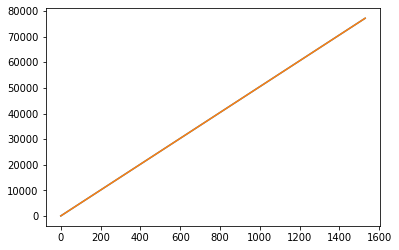

In [53]:
import matplotlib.pyplot as plt

# There was a discontinuity because of a past, longer recording session
# Plot of all frame timestamps

plt.plot(intFrameTimes[:17805])
plt.plot(mainFrameTimes[:17805])

In [54]:
# Check each interframe length

intFrameLengths = np.diff(intFrameTimes)
mainFrameLengths = np.diff(mainFrameTimes)

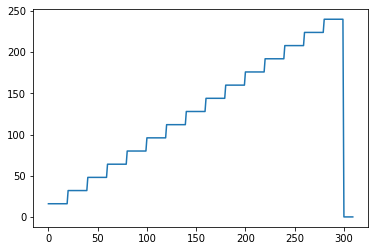

In [44]:
plt.plot(EWLVoltage[:310])

(array([   0., 1529.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250]),
 <a list of 9 Patch objects>)

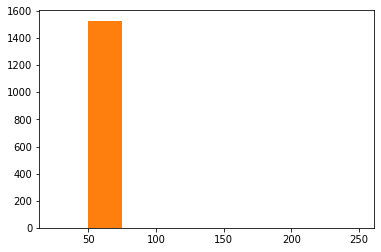

In [55]:
# Histogram of interframe lengths


#plt.hist(frameLengths, bins='auto')
# plt.hist(frameLengths, bins=[-3400, -3000, -2600, -2200, -1800, -1400, -1000, -600, -200, 200, 600, 1000])
plt.hist(intFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.hist(mainFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

# plt.hist(frameLengths, bins=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


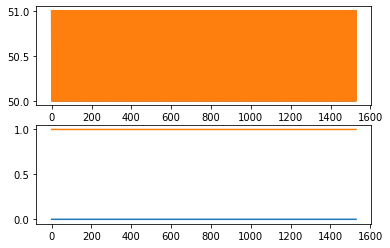

In [56]:
# figure = plt.subplots()

# Plot of all framelengths
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs)

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs)

# Zoom into where short/long interframe lengths are
# plt.subplot(4, 1, 3)
# plt.plot(frameLengths[45:105])

# plt.subplot(4, 1, 4)
# plt.plot(waitingFrames[45:105])

# figure.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


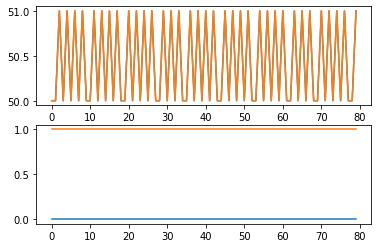

In [32]:
# Zoom into where short/long interframe lengths are
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs[0:80])

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs[0:80])

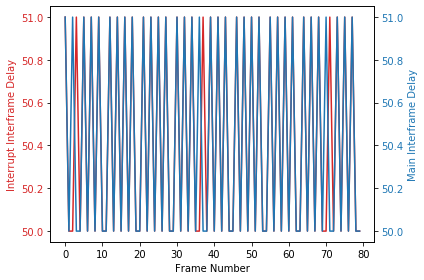

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Frame Number')
ax1.set_ylabel('Interrupt Interframe Delay', color=color)
ax1.plot(intFrameLengths[0:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Main Interframe Delay', color=color)  # we already handled the x-label with ax1
ax2.plot(mainFrameLengths[0:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [10]:
print(mainFrameLengths[-20:], "\n", sorted(intFrameLengths)[-10:])

[51 50 51 50 51 50 51 50 50 51 50 51 50 51 50 51 50 50 51 50] 
 [101, 101, 101, 101, 101, 101, 151, 151, 151, 152]


In [17]:
# Check if other interrupts are working fine


print(len(frameList), max(np.diff(frameList)), min(np.diff(frameList)), frameList.count(0), frameList.index(0))
print(len(frameLines), max(frameLines), min(frameLines))
print(len(frameDMA), max(frameDMA), min(frameDMA))

17805 1 1 1 0
17805 296 296
17805 1 1


In [18]:
# Where are the wrong interframe time lengths?

frameTimeDict = {i + 1: frameLengths[i] for i in range(len(frameLengths))} 

longFrameDict = {k: v for k, v in frameTimeDict.items() if (v >51)}
shortFrameDict = {k: v for k, v in frameTimeDict.items() if (v < 50)}
print(sorted(frameLengths))
print(shortFrameDict, longFrameDict, len(longFrameDict) + len(shortFrameDict))

NameError: name 'frameLengths' is not defined

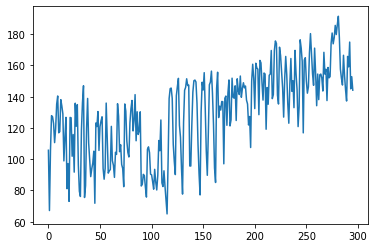

In [23]:
#Begin looking at each frame

frameRowMean = np.mean(frameArray[51], axis=1)
plt.plot(frameRowMean)

In [89]:
# I could do either minimum row or maximum-difference-from-adjacent row and track them through frames.
# Throw out the outliers?
numPlots = 3
darkRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    rowMeanDict = {i : frameRowMean[i] for i in range(0, len(frameRowMean))} # a dictionary with row:mean
    threeDarkRows = sorted(rowMeanDict, key=rowMeanDict.get, reverse=False)[:numPlots] # sorted list of three darkest rows
    darkRowProg[i] = threeDarkRows
    
    
#    darkRowVal = {i : rowMeanDict[i] for i in threeDarkRows} # sorted dict of darkest rows/their vals
#    print(darkRowVal)

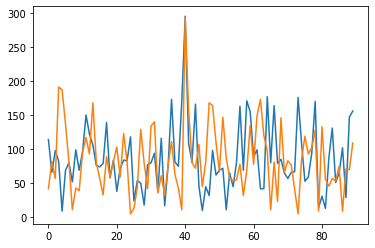

In [90]:
dark1Row = [i[0] for i in darkRowProg.values()]
dark2Row = [i[1] for i in darkRowProg.values()]
dark3Row = [i[2] for i in darkRowProg.values()]
plt.plot(list(darkRowProg.keys()), dark1Row)
plt.plot(list(darkRowProg.keys()), dark2Row)
# plt.plot(list(darkRowProg.keys()), dark3Row)
plt.show()

In [91]:
# Let's try maximum-difference
numPlots = 3
dipRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    dipRowMean = np.diff(frameRowMean)
    rowDipDict = {i : dipRowMean[i] for i in range(0, len(dipRowMean))}
    threeDipRows = sorted(rowDipDict, key=rowDipDict.get, reverse=False)[:numPlots] # sorted list of three largest dips
    dipRowProg[i] = threeDipRows

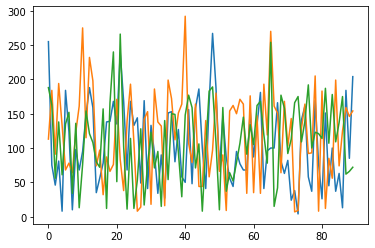

In [92]:
deep1Row = [i[0] for i in dipRowProg.values()]
deep2Row = [i[1] for i in dipRowProg.values()]
deep3Row = [i[2] for i in dipRowProg.values()]
plt.plot(list(darkRowProg.keys()), deep1Row)
plt.plot(list(darkRowProg.keys()), deep2Row)
plt.plot(list(darkRowProg.keys()), deep3Row)
plt.show()